# ICH V4 manips


## import + bases


In [1]:

import nibabel as nib
import numpy as np
import os


%matplotlib inline
import matplotlib.pyplot as plt

import os
print("Répertoire de travail actuel :", os.getcwd())
print(os.listdir("../..")) #premier test


Répertoire de travail actuel : /store/home/tibia/Projet_Hemorragie/Seg_hemorragie/splitv2/ich_seg_v4_adrien
['.git', 'pipeline.py', 'inference_mbh.py', 'README.md', 'pipeline_v4', 'splitv2', 'seg_ICH.py']


In [ ]:

root_folder= '/home/tibia/Projet_Hemorragie/Seg_hemorragie/splitv2/ich_seg_v4_adrien'

for subfolder in ['imagesTr','labelsTr']:
    folder_path=os.path.join(root_folder,subfolder)
    files=os.listdir(folder_path)
    print(f'nombre de fichiers dans {folder_path}= {len(files)}')
    print('-------------------------------')

for subfolder in ['imagesTs','labelsTs']:
    folder_path=os.path.join(root_folder,subfolder)
    files=os.listdir(folder_path)
    print(f'nombre de fichiers dans {folder_path}= {len(files)}')
    print('-------------------------------')


nombre de fichiers dans /home/tibia/Projet_Hemorragie/Seg_hemorragie/splitv2/ich_seg_v4_adrien/imagesTr= 341
-------------------------------
nombre de fichiers dans /home/tibia/Projet_Hemorragie/Seg_hemorragie/splitv2/ich_seg_v4_adrien/labelsTr= 341
-------------------------------
nombre de fichiers dans /home/tibia/Projet_Hemorragie/Seg_hemorragie/splitv2/ich_seg_v4_adrien/imagesTs= 18
-------------------------------
nombre de fichiers dans /home/tibia/Projet_Hemorragie/Seg_hemorragie/splitv2/ich_seg_v4_adrien/labelsTs= 18
-------------------------------


## Conversion nnUNet

In [ ]:
#Format nnUNet
root_folder = '/home/tibia/Documents/nnUNet/splitv2/ich_seg_v4_adrien/'
images_folder = os.path.join(root_folder, 'imagesTs')


if os.path.exists(images_folder):
    files = os.listdir(images_folder)
    print(f"il y a {len(files)} fichiers dans {images_folder}")
    for file in files:
        if file.endswith('.nii.gz'):  # Vérifie le format d'image attendu
            # Sépare le nom et l'extension
            base, ext = os.path.splitext(file)

            # Si l'extension est .gz, traite correctement le double suffixe
            if base.endswith('.nii'):
                base, nii_ext = os.path.splitext(base)
                ext = nii_ext + ext

            # Vérifie si le suffixe _0000 est déjà présent
            if not base.endswith('_0000'):
                new_name = f"{base}_0000{ext}"
                old_path = os.path.join(images_folder, file)
                new_path = os.path.join(images_folder, new_name)

                # Renomme le fichier
                os.rename(old_path, new_path)
                print(f"Renommé : {file} → {new_name}")
            else:
                print(f"Déjà au format nnU-Net : {file}")
else:
    print(f"Le dossier {images_folder} n'existe pas.")


il y a 18 fichiers dans /home/tibia/Documents/nnUNet/splitv2/ich_seg_v4_adrien/imagesTs
Renommé : ID_7f88806c.nii.gz → ID_7f88806c_0000.nii.gz
Renommé : ID_02599242.nii.gz → ID_02599242_0000.nii.gz
Renommé : ID_3909b107.nii.gz → ID_3909b107_0000.nii.gz
Renommé : ID_3b4accbe.nii.gz → ID_3b4accbe_0000.nii.gz
Renommé : ID_28d52dd2.nii.gz → ID_28d52dd2_0000.nii.gz
Renommé : ID_4d990362.nii.gz → ID_4d990362_0000.nii.gz
Renommé : ID_3604e294.nii.gz → ID_3604e294_0000.nii.gz
Renommé : ID_76aeaf2d.nii.gz → ID_76aeaf2d_0000.nii.gz
Renommé : ID_ad9019df.nii.gz → ID_ad9019df_0000.nii.gz
Renommé : ID_730cb33c.nii.gz → ID_730cb33c_0000.nii.gz
Renommé : ID_0634c835.nii.gz → ID_0634c835_0000.nii.gz
Renommé : ID_8e954b69.nii.gz → ID_8e954b69_0000.nii.gz
Renommé : ID_a6c3a453.nii.gz → ID_a6c3a453_0000.nii.gz
Renommé : ID_22257cef.nii.gz → ID_22257cef_0000.nii.gz
Renommé : ID_747f1c99.nii.gz → ID_747f1c99_0000.nii.gz
Renommé : ID_21daa8ce.nii.gz → ID_21daa8ce_0000.nii.gz
Renommé : ID_40d6277f.nii.gz → I

## Split V4

In [ ]:
import os
import numpy as np
from collections import defaultdict
import nibabel as nib  # si format NIfTI

root_folder = '/home/tibia/Projet_Hemorragie/Seg_hemorragie/splitv2/ich_seg_v4_adrien'

def count_images_per_label(folder_path):
    label_counts = {0: 0, 1: 0, 2: 0, 3: 0}  # Initialise tous les labels à 0
    
    files = os.listdir(folder_path)
    print(f"Analyse de {len(files)} fichiers...")
    
    for i, file in enumerate(files):
        if i % 50 == 0:  
            print(f"Traitement du fichier {i}/{len(files)}...")
            
        file_path = os.path.join(folder_path, file)
        
   
        img = nib.load(file_path)
        data = img.get_fdata()
        
        # Labels uniques pour image donnée
        present_labels = np.unique(data)
      
        for label in present_labels:
            if label in label_counts:
                label_counts[label] += 1
    
    return label_counts

# Analyse pour les données d'entraînement
print("\nAnalyse des labelsTr...")
labelsTr_path = os.path.join(root_folder, 'labelsTr')
train_counts = count_images_per_label(labelsTr_path)
print("\nRésultat pour labelsTr (entraînement):")
for label, count in sorted(train_counts.items()):
    print(f"Label {label}: présent dans {count} images")

# Analyse pour les données de test
print("\nAnalyse des labelsTs...")
labelsTs_path = os.path.join(root_folder, 'labelsTs')
test_counts = count_images_per_label(labelsTs_path)
print("\nRésultat pour labelsTs (test):")
for label, count in sorted(test_counts.items()):
    print(f"Label {label}: présent dans {count} images")


Analyse des labelsTr...
Analyse de 341 fichiers...
Traitement du fichier 0/341...
Traitement du fichier 50/341...
Traitement du fichier 100/341...
Traitement du fichier 150/341...
Traitement du fichier 200/341...
Traitement du fichier 250/341...
Traitement du fichier 300/341...

Résultat pour labelsTr (entraînement):
Label 0: présent dans 341 images
Label 1: présent dans 341 images
Label 2: présent dans 188 images
Label 3: présent dans 330 images

Analyse des labelsTs...
Analyse de 18 fichiers...
Traitement du fichier 0/18...

Résultat pour labelsTs (test):
Label 0: présent dans 18 images
Label 1: présent dans 18 images
Label 2: présent dans 9 images
Label 3: présent dans 17 images


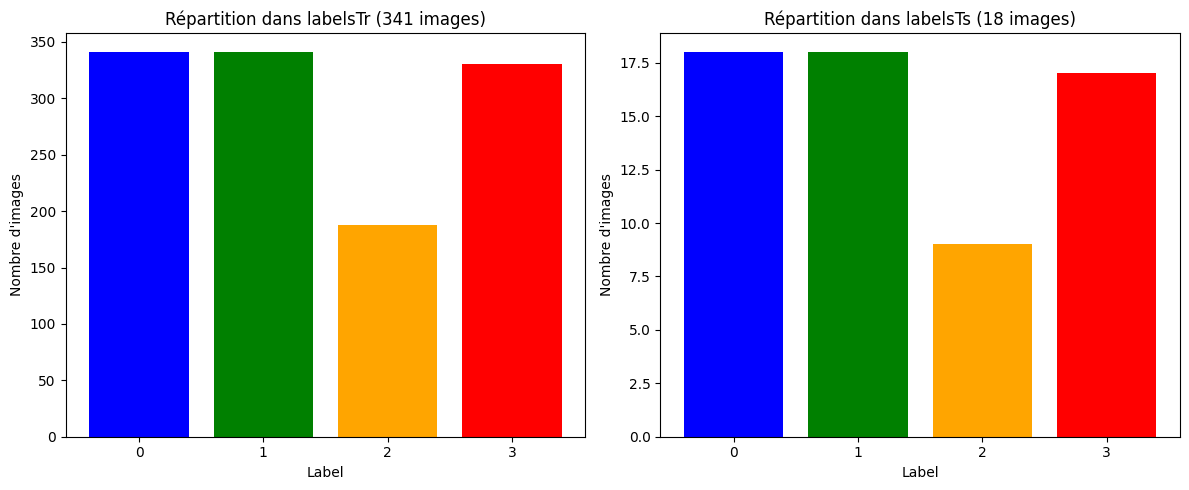

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Vos données
labels = [0, 1, 2, 3]
train_counts = [341, 341, 188, 330]  # labelsTr
test_counts = [18, 18, 9, 17]        # labelsTs

# Calcul des pourcentages
train_perc = [count/train_counts[0]*100 for count in train_counts]
test_perc = [count/test_counts[0]*100 for count in test_counts]

# Création du graphique
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graphique pour l'entraînement
ax1.bar(labels, train_counts, color=['blue', 'green', 'orange', 'red'])
ax1.set_title('Répartition dans labelsTr (341 images)')
ax1.set_xlabel('Label')
ax1.set_ylabel('Nombre d\'images')
ax1.set_xticks(labels)


# Graphique pour le test
ax2.bar(labels, test_counts, color=['blue', 'green', 'orange', 'red'])
ax2.set_title('Répartition dans labelsTs (18 images)')
ax2.set_xlabel('Label')
ax2.set_ylabel('Nombre d\'images')
ax2.set_xticks(labels)


plt.tight_layout()
plt.show()

In [2]:
import os
import numpy as np
import shutil
from glob import glob
import nibabel as nib


orig_root = '/home/tibia/Projet_Hemorragie/Seg_hemorragie/splitv2/ich_seg_v4_adrien'
monai_root = os.path.join(orig_root, 'split_MONAI')


os.makedirs(os.path.join(monai_root, 'imagesTr'), exist_ok=True)
os.makedirs(os.path.join(monai_root, 'labelsTr'), exist_ok=True)
os.makedirs(os.path.join(monai_root, 'imagesVal'), exist_ok=True)
os.makedirs(os.path.join(monai_root, 'labelsVal'), exist_ok=True)


all_images = sorted(glob(os.path.join(orig_root, 'imagesTr', '*.nii.gz')))
all_labels = sorted(glob(os.path.join(orig_root, 'labelsTr', '*.nii.gz')))

# liste image avec label 2
has_label2 = []
for label_path in all_labels:
    if 2 in np.unique(nib.load(label_path).get_fdata()):
        has_label2.append(True)
    else:
        has_label2.append(False)

has_label2 = np.array(has_label2)

# 3. Sélectionner 15 avec label 2 + 15 aléatoire 
np.random.seed(42)
label2_indices = np.where(has_label2)[0]
other_indices = np.where(~has_label2)[0]

selected_label2 = np.random.choice(label2_indices, 15, replace=False)
selected_others = np.random.choice(other_indices, 15, replace=False)
val_indices = np.concatenate([selected_label2, selected_others])


for i, (img_path, label_path) in enumerate(zip(all_images, all_labels)):
    if i in val_indices:
        # Copie vers validation
        shutil.copy(img_path, os.path.join(monai_root, 'imagesVal', os.path.basename(img_path)))
        shutil.copy(label_path, os.path.join(monai_root, 'labelsVal', os.path.basename(label_path)))
    else:
        # Copie vers entraînement
        shutil.copy(img_path, os.path.join(monai_root, 'imagesTr', os.path.basename(img_path)))
        shutil.copy(label_path, os.path.join(monai_root, 'labelsTr', os.path.basename(label_path)))

# 5. Vérification
def count_labels(folder):
    counts = {0:0, 1:0, 2:0, 3:0}
    for f in glob(os.path.join(folder, '*.nii.gz')):
        data = nib.load(f).get_fdata()
        for lbl in np.unique(data):
            counts[lbl] += 1
    return counts

print("\n=== Vérification ===")
print("Train - Labels:", count_labels(os.path.join(monai_root, 'labelsTr')))
print("Val   - Labels:", count_labels(os.path.join(monai_root, 'labelsVal')))

print("\nNombre d'images :")
print(f"Train: {len(os.listdir(os.path.join(monai_root, 'imagesTr')))}")
print(f"Val: {len(os.listdir(os.path.join(monai_root, 'imagesVal')))}")


=== Vérification ===
Train - Labels: {0: 311, 1: 311, 2: 173, 3: 301}
Val   - Labels: {0: 30, 1: 30, 2: 15, 3: 29}

Nombre d'images :
Train: 311
Val: 30


## statistic generation

In [11]:
def load_nifti(file_path):
    img = nib.load(file_path)
    return img.get_fdata(), img  

# Calculer les statistiques demandées
def compute_statistics(image_array):
    min_val = np.min(image_array)
    max_val = np.max(image_array)
    mean_val = np.mean(image_array)

    non_zero_pixels = image_array[image_array > 0]
    non_zero_mean = np.mean(non_zero_pixels) if non_zero_pixels.size > 0 else 0

    p_05 = np.percentile(image_array, 0.5)
    p_995 = np.percentile(image_array, 99.5)

    return {
        "min": min_val,
        "max": max_val,
        "mean": mean_val,
        "non_zero_mean": non_zero_mean,
        "0.5% percentile": p_05,
        "99.5% percentile": p_995
    }

# Exemple d'utilisation avec un fichier .nii.gz

image_array, nib_image = load_nifti(file_path)
stats = compute_statistics(image_array)

# Afficher les résultats
print(stats)

{'min': -1024.0, 'max': 1668.0, 'mean': -633.3997630557499, 'non_zero_mean': 166.25389056828413, '0.5% percentile': -1012.0, '99.5% percentile': 919.0}


In [12]:
#meme chose pour l'image segmentee
file = "ID_b65b5eef.nii.gz" 
file_path_2= os.path.join(os.path.join(root_folder,'seg'),file)
print("Fichier trouvé :", os.path.exists(file_path_2))

segmentation_array, nib_image_2 = load_nifti(file_path_2)
stats = compute_statistics(segmentation_array)
print(stats)

Fichier trouvé : True
{'min': 0.0, 'max': 3.0, 'mean': 0.005533456802368164, 'non_zero_mean': 2.518064446132147, '0.5% percentile': 0.0, '99.5% percentile': 0.0}
